# Clustering en Pokedex

In [1]:
import pandas as pd

Pokedex = pd.read_csv("../Datasets/Pokemon.csv")
Pokedex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
4,4,309,39,52,43,60,50,65,1


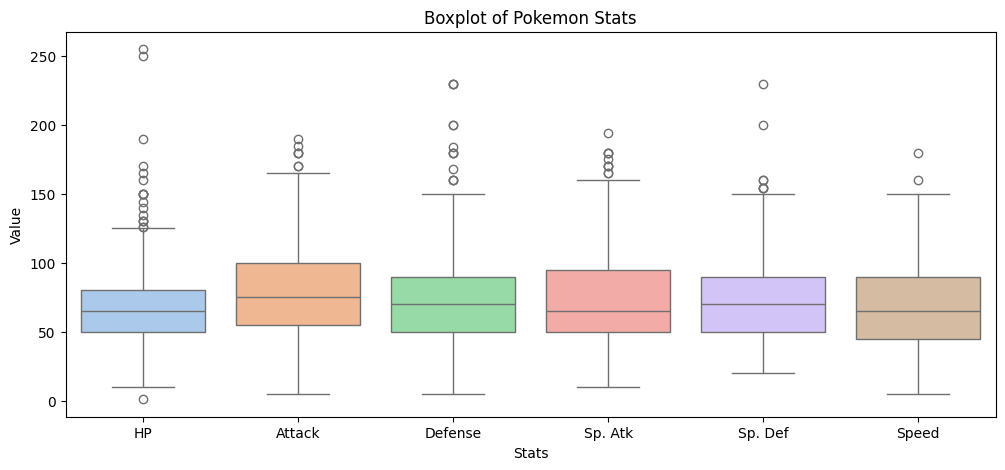

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Pokedex_stats = Pokedex.select_dtypes(include='number')
display(Pokedex_stats.head())
Pokedex_stats = Pokedex[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
df_melted = Pokedex_stats.melt()

plt.figure(figsize=(12,5))
sns.boxplot(x='variable', y='value', data=df_melted, palette='pastel', hue='variable')
plt.title('Boxplot of Pokemon Stats')
plt.xlabel('Stats')
plt.ylabel('Value')
plt.show()

In [3]:
Pokedex_stats.isnull().sum()

HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64

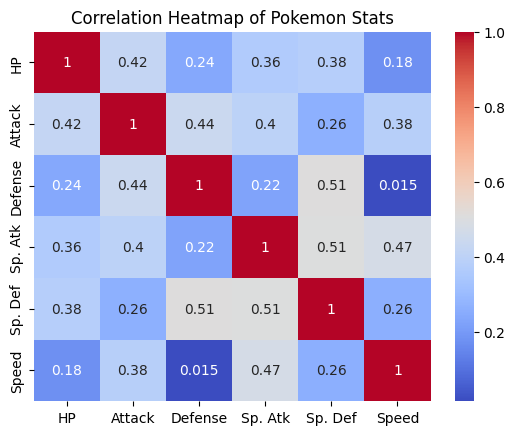

In [4]:
sns.heatmap(Pokedex_stats.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pokemon Stats')
plt.show()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


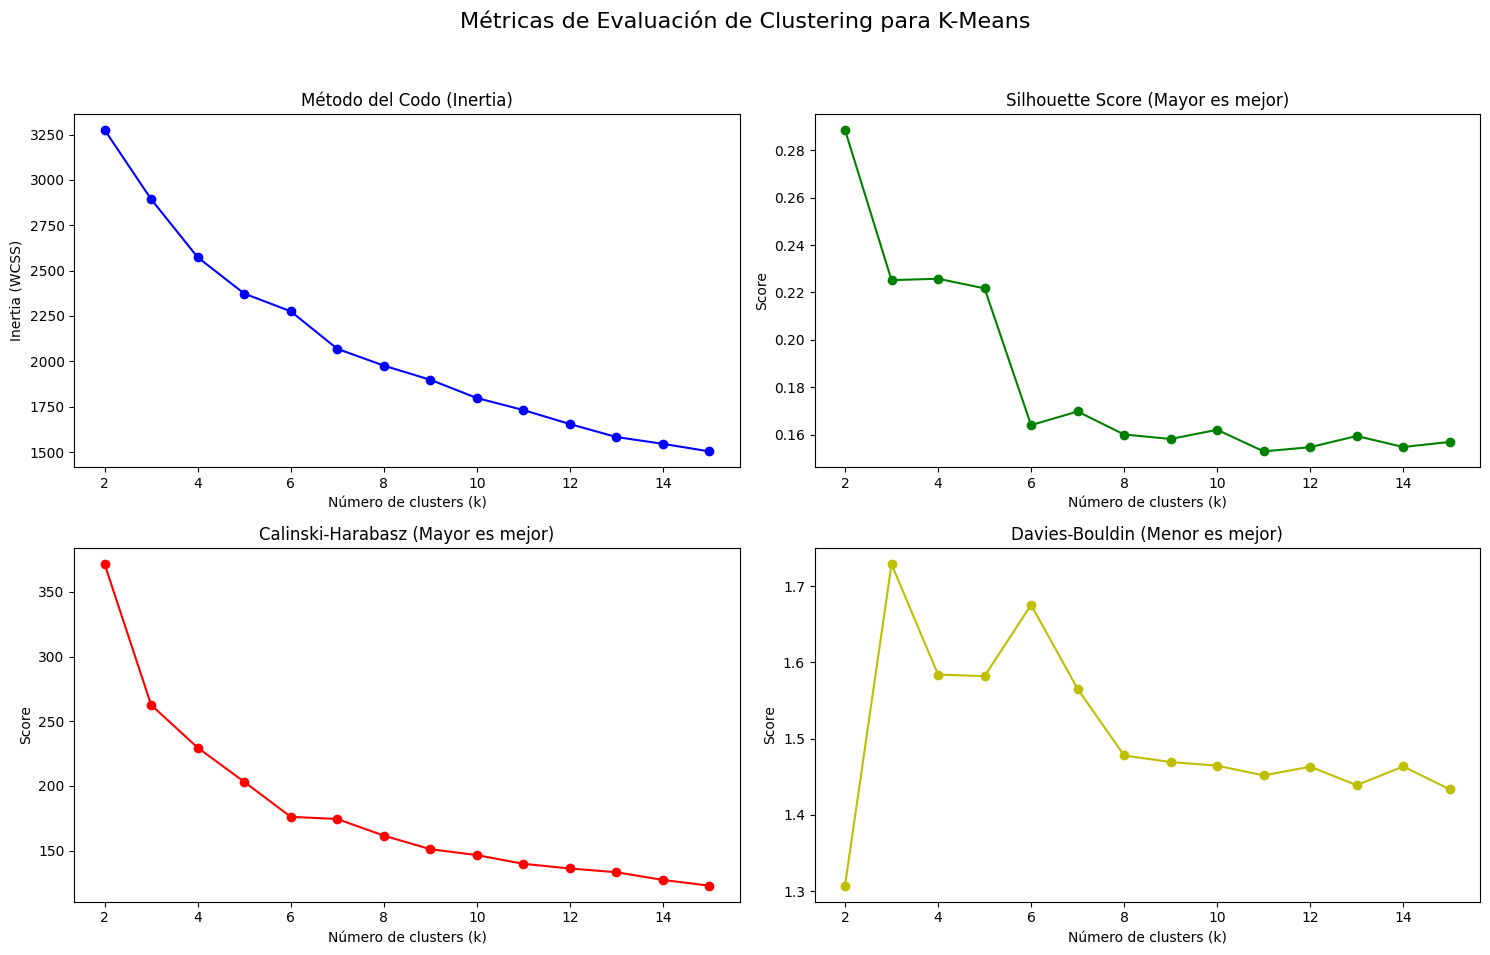

In [5]:
from KMeansPipelineEvaluator import KMeansPipelineEvaluator
from sklearn.preprocessing import StandardScaler

preprocessing_steps = [('scaler', StandardScaler())]

k_range = range(2, 16)
display(Pokedex_stats.head())

evaluator = KMeansPipelineEvaluator(preprocessing_steps=preprocessing_steps,
                                    k_range=k_range)
evaluator.fit(Pokedex_stats)
evaluator.plot_metrics()

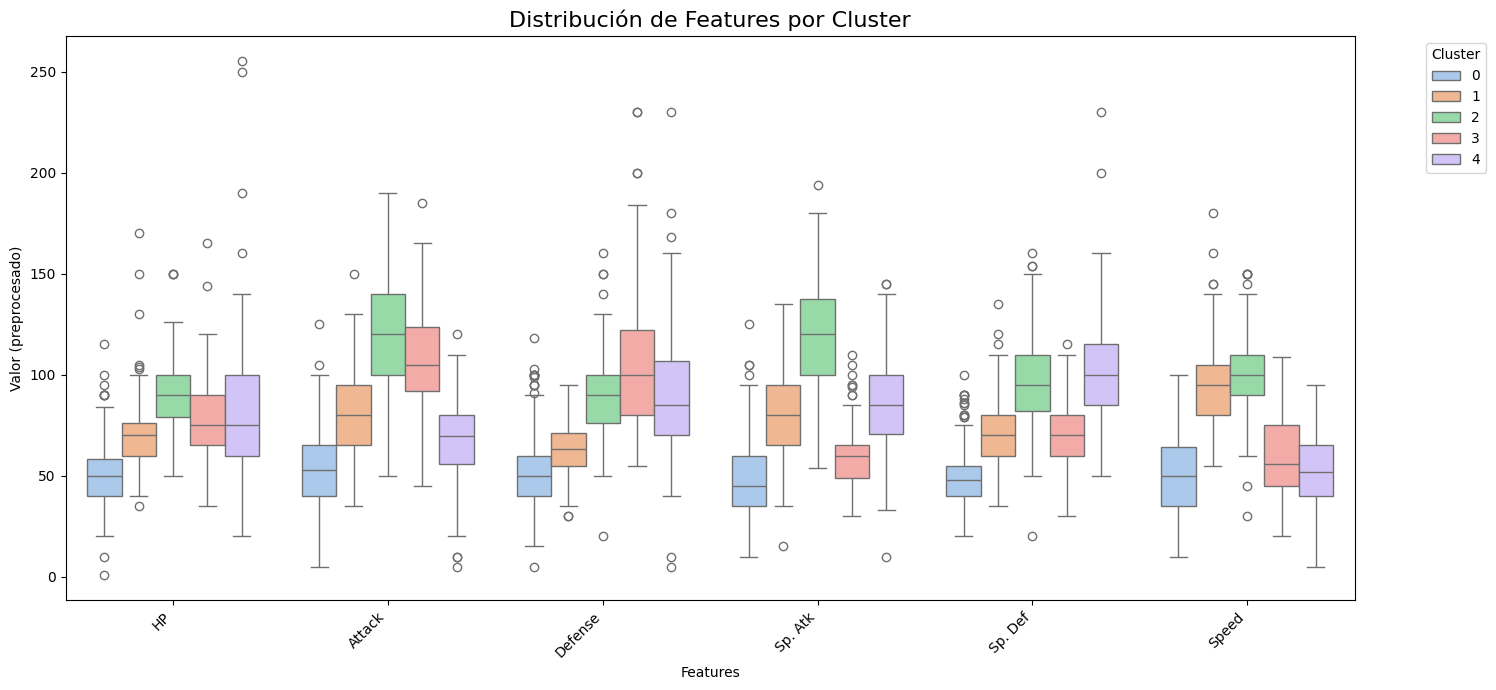

In [6]:
from KMeansAnalyzer import KMeansAnalyzer

labels = evaluator.kmeans_models_[5].labels_
analyzer = KMeansAnalyzer(Pokedex_stats, labels)

analyzer.plot_boxplots()

In [7]:
median_profiles = analyzer.get_profiles(agg_func='median')
median_profiles

Generando perfiles de cluster usando: median


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Cluster,,,,,,
0,50.0,53.0,50.0,45.0,48.0,50.0
1,70.0,80.0,63.0,80.0,70.0,95.0
2,90.0,120.0,90.0,120.0,95.0,100.0
3,75.0,105.0,100.0,60.0,70.0,56.0
4,75.0,69.5,85.0,85.0,100.0,52.0


Generando perfiles de cluster usando: mean


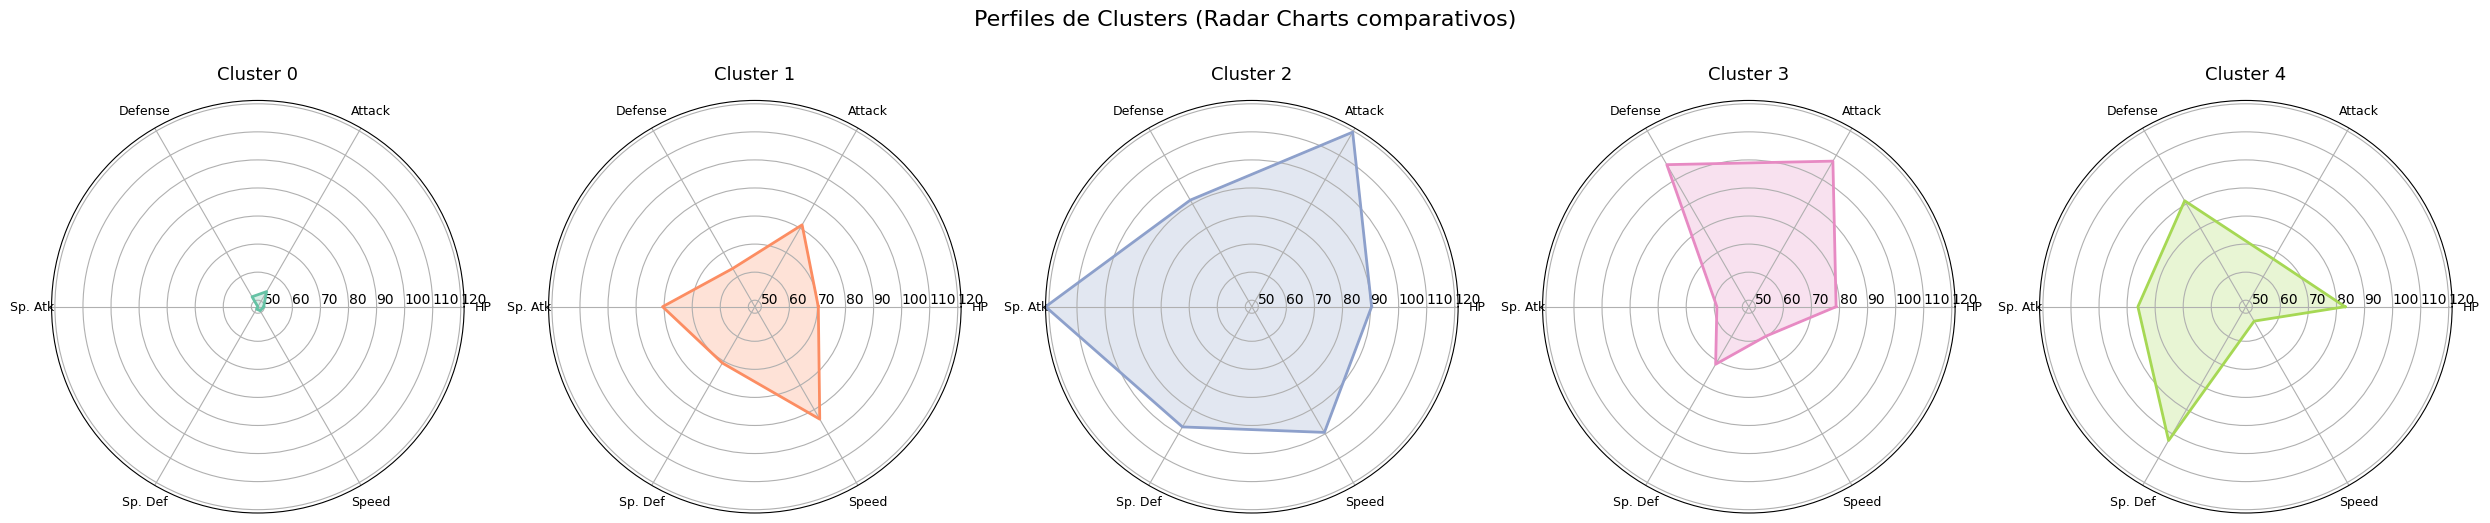

In [8]:
analyzer.plot_radar_charts(agg_func='mean')